In [135]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [136]:
wine = load_wine()
f=pd.DataFrame(wine.data,columns=wine.feature_names)
t=pd.DataFrame(wine.target,columns=['target'])
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [137]:
xtrain, xtest ,ytrain ,ytest=train_test_split(f,t,test_size=0.3) 

In [148]:
f1='malic_acid'
f2='ash'
f3='magnesium'
basex=np.array(xtrain[[f1,f2,f3]])
basey=np.array(ytrain['target'])

xtest= np.array(xtrain[[f1,f2,f3]])
ytest=np.array(ytrain['target'])


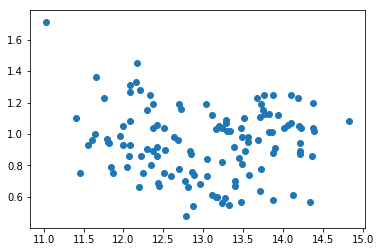

In [149]:
plt.scatter(x.iloc[:,0],x.iloc[:,1])

In [150]:
k = 3
tol = 0.001
max_iter = 300

In [151]:
colors = 10*["g","r","c","b","k",'y']

In [152]:
def fit(data,k,max_iter,tol):

    centroids = {}
#     print(data)
    for i in range(k):
        centroids[i] = data[i]

    for i in range(max_iter):
        classifications = {}

        for i in range(k):
            classifications[i] = []

        for featureset in data:
            distances = [np.linalg.norm(featureset-centroids[centroid]) for centroid in centroids]
            classification = distances.index(min(distances))
            classifications[classification].append(featureset)

        prev_centroids = dict(centroids)

        for classification in classifications: 
            centroids[classification] = np.average(classifications[classification],axis=0)
           

        optimized = True

        for c in centroids:
            original_centroid = prev_centroids[c]
            current_centroid = centroids[c]
            if original_centroid[c]==current_centroid[c]:
            #if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > tol:
            #    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                optimized = False

        if optimized:
            break
    return centroids, classifications

def predict(data,centroids):
    distances = [np.linalg.norm(data-centroids[centroid]) for centroid in centroids]
    classification = distances.index(min(distances))
    return classification  

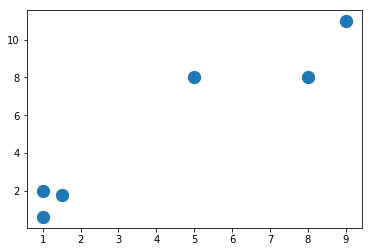

In [153]:

#X = np.array([[1, 2],
#              [1.5, 1.8],
#              [5, 8 ],
#              [8, 8],
#              [1, 0.6],
#              [9,11]])

plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [163]:
centroids, classifications = fit(basex,k,max_iter,tol)


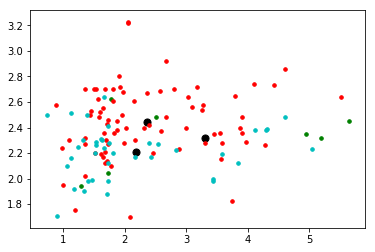

In [164]:
for centroid in centroids:
    plt.scatter(centroids[centroid][0], centroids[centroid][1], marker='o', color='k', s=50)

for classification in classifications:
    color = colors[classification]
    for featureset in classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker='.', color=color, s=50)

#xtest = np.array([[1,3],
#                  [8,9],
 #                 [0,3],
  #                [5,4],
   #               [6,4],
    #             [2,3]])

#for unknown in xtest:
 #   classification = predict(unknown,centroids)
  #  plt.scatter(unknown[0], unknown[1], marker='*', color=colors[classification], s=50)

In [165]:
def acc(xt,yt):
    correct=0
    for i in range(len(xt)):
        p=predict(xt,centroids)
        if p==yt[i]:
            correct+=1
    return (f'accuracy: {correct/len(xt)}')
    

In [166]:
acc(xtest,ytest)

'accuracy: 0.3225806451612903'